## Autocorrelation Function and Correlogram.

And now for something completely different.

Autocorrelation, as the name says, is the correlation of a time series (a dataset) with itself. Why is this any useful, for a start? 

It actually has some important applications. For example, it can be used to "characterize the physical properties of an event over its lifetime"$^{1}$ by giving us an idea of "persistence"$^{2}$ or even of "independence" between different occurrences of the same event. 

Also it can be used for an estimation of the "effective number of degrees of freedom"$^{3}$, vital for Hypothesis Testing and Statistical Significance. This topic is a very interesting and important one, filled with lots of old polemics which we shall adress later.

Our goal here is to compute the Autocorrelation Functions of a time series and to plot its correlogram later. For this we shall use the Niño 3 index, obtained from the [Climate Indices](http://nbviewer.jupyter.org/github/willyhagi/climate-statistics/blob/master/Jupyter-Notebooks/annual_cycle.ipynb) lesson, here defined for the 1951-2015 period.

By the way, I recommend you to read a very good introduction to Autocorrelations [here.](A Gentle Introduction to Autocorrelation and Partial Autocorrelation)

In [2]:
import numpy              as np
import matplotlib.pylab   as plt
import math


from statsmodels.tsa.stattools      import acf
from scipy.signal                   import detrend

/home/willyhagi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


That's the punchline of our sketch. But don't worry, we can still use the [Autocorrelation Function](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html) from the StatsModel package (if we ignore it, maybe it will go away).

In [3]:
sst  =  np.loadtxt('nino3.asc')

Thanks to StatsModel, the ACF will simply be:

In [4]:
##----- autocorrelation function and confidence intervals
acf_total, conf  =  acf(sst, alpha=0.05, nlags=425, fft=True,
                        unbiased=True)
conf -= conf.mean(1)[:,None]  # lag 0 confidence intervals

As you can see, there are lots of parameters available for the acf function (check them out!). We are also interested on the confidence interval levels (for alpha = 0.05, usually translated as '95% significance') from lag 0 and beyond. 

We can plot the first 10 (or all of them, if you want) values for our correlogram easily with Matplotlib, even though we can also use StatsModel to do the same.

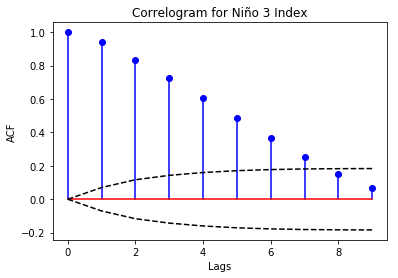

In [5]:
plt.stem(np.arange(0,10,1), acf_total[0:10], linefmt='b-',
                            markerfmt='bo', basefmt='r-')
plt.plot(np.arange(0,10,1), conf[0:10], 'k--')
plt.title(u'Correlogram for Niño 3 Index')
plt.xlabel(u'Lags')
plt.ylabel(u'ACF')
plt.show()

And this solves our problems. The second part is the estimation of the "effective number of degrees of freedom", usually defined as:

$N_{ef} =  \frac{N}{\tau}$

Where $N_{ef}$ is our effective number, N is the lenght of the time series and $\tau$ we are defining here as the lag number where the first ACF value falls below the 95% significance line.

$\tau$ can be estimated using many different methods, and the one defined here is an unusual but valid one. We shall adress this later.

In [6]:
def dof(acfunc, confint, N):
    # estimating the effective sample size of data with acf
    lag  =  np.where(acfunc < conf[:,1])
    lag  =  lag[0][0]
    nef  =  N / lag
    return nef

With the above function, we can get the lag number where the first value drops below the significance line and estimate the $N_{ef}$.

In [7]:
##----- estimating the effective sample size
n   = len(sst) / 12. # number of years
df  =  dof(acf_total, conf, n )
print (df)

8.125


The N defined was the number of years (65, from the 1951-2015 period), but can be the whole length of the time series as well. You can see from the correlogram that the first value falls at lag 8, so 65/8 = 8.125. 

For Hypothesis Testing and Statistical Significance, that could be the value you would use to do it. That's the topic of our next lesson, hope you've enjoyed this one!

### NOTE: No statisticians were harmed in the making of this notebook.

## REFERENCES

1 - Duchon, Claude, and Robert Hale. Time series analysis in meteorology and climatology: an introduction. Vol. 7. John Wiley & Sons, 2012.

2 - Wilks, Daniel S. Statistical methods in the atmospheric sciences. Vol. 100. Academic press, 2011.

3 - Thiébaux, H. Jean, and Francis W. Zwiers. "The interpretation and estimation of effective sample size." Journal of Climate and Applied Meteorology 23.5 (1984): 800-811.